# Titanic 

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sbs
import itertools

%matplotlib inline
sbs.set()

## Load Data

In [2]:
inputTitanic = pd.read_csv('train.csv')

In [3]:
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Display Survival Rate by differents features

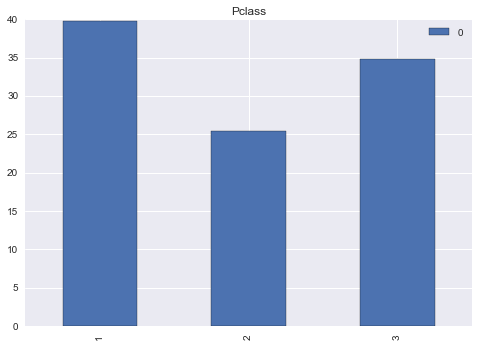

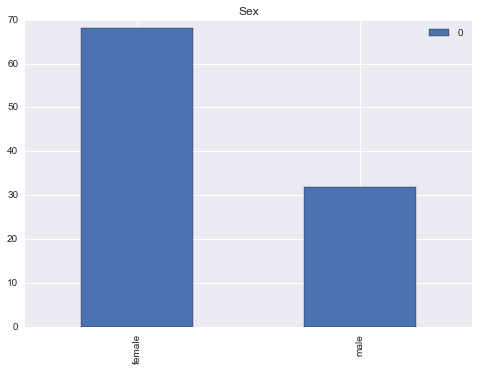

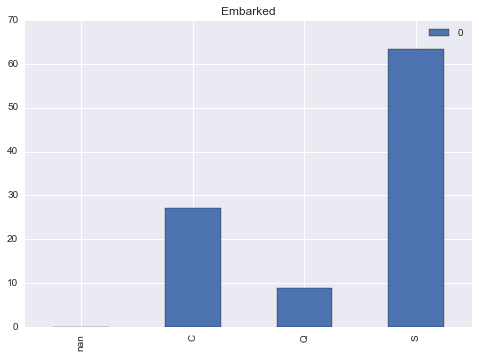

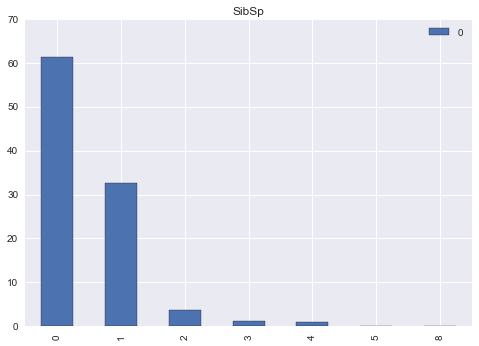

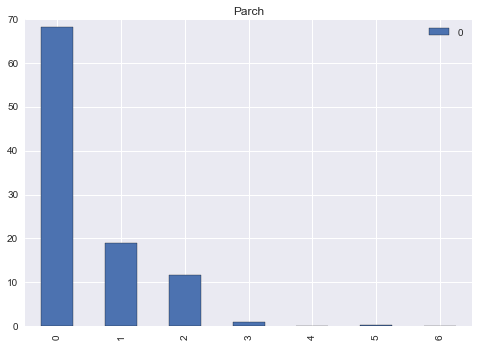

In [4]:
def DisplayRate(data, feature):
    ##Unique labels & values
    ser = data[feature]
    labels = sorted(set(ser))    
    values = pd.Series(0,index=labels)
    ##For each value calculate the rate
    total = sum(data.Survived)
    for l in labels:    
        values[l]=sum(data.Survived[ser==l])
    values=values/total*100
    ##Display a plot
    df = pd.DataFrame(values)
    df.plot.bar().set_title(feature)
    plt.show()    
    return
DisplayRate(inputTitanic,'Pclass')
DisplayRate(inputTitanic,'Sex')
DisplayRate(inputTitanic,'Embarked')
DisplayRate(inputTitanic,'SibSp')
DisplayRate(inputTitanic,'Parch')

Port of embarkation histogram

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

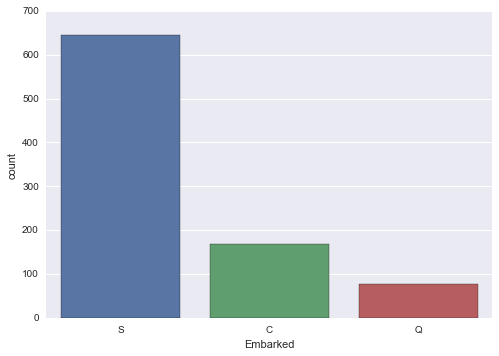

In [5]:
sbs.countplot(inputTitanic.Embarked)
inputTitanic['Embarked'].value_counts()/len(inputTitanic)*100

As the distribution of port and the survival rate for each is quite similar it is not a good value.

### Add the familly numbers (parch+sibsp)

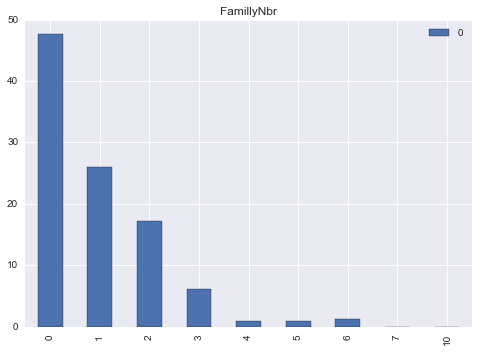

In [7]:
inputTitanic['FamillyNbr']=inputTitanic.Parch+inputTitanic.SibSp
inputTitanic.head(2)
DisplayRate(inputTitanic,'FamillyNbr')

### Clean Age data because values are missing
We add the median for empty values

In [8]:
ageFilled = inputTitanic.Age.fillna(inputTitanic.Age.median())
inputTitanic['AgeInteger']=map(lambda x:int(round(x)), ageFilled)
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyNbr,AgeInteger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38


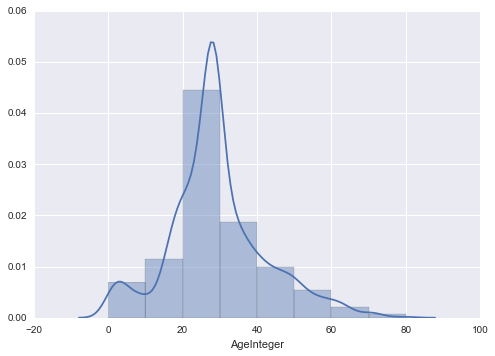

In [9]:
sbs.distplot(inputTitanic.AgeInteger,bins=8)


We transform into ranges to analyze more easily

In [10]:
inputTitanic['AgeRange']=inputTitanic['AgeInteger']//10*10

### Range for fare

In [11]:
#Display summary 
inputTitanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

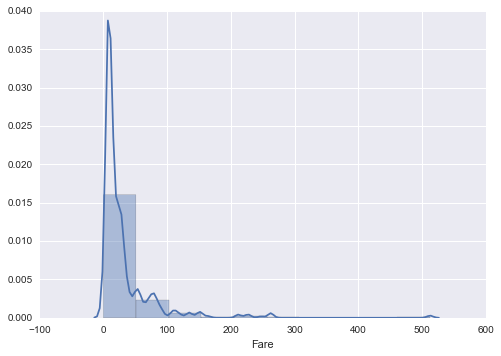

In [12]:
sbs.distplot(inputTitanic.Fare,bins=10)

In [13]:
inputTitanic['FareRange']=inputTitanic.Fare.apply(lambda x:100 if x>100 else x//10*10)

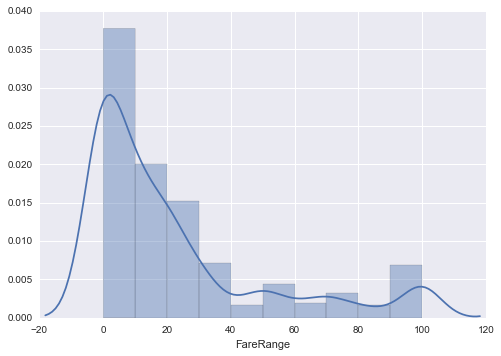

In [14]:
sbs.distplot(inputTitanic.FareRange,bins=10)

### Display survival rate per these two features

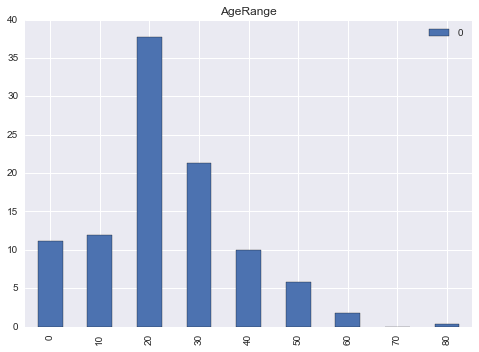

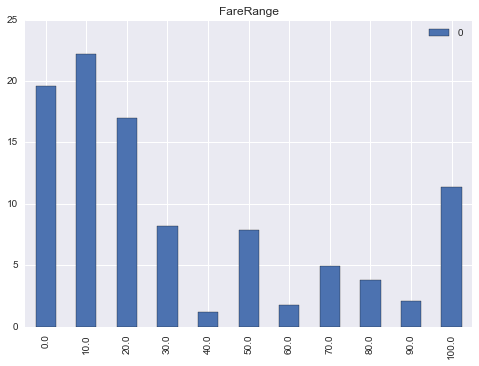

In [15]:
DisplayRate(inputTitanic,'AgeRange')
DisplayRate(inputTitanic,'FareRange')

# Predict manually
## Based on best looking features
(biggest difference between survived and not)

### Sex & Familly & Age

In [16]:
#Group by
groupedData = inputTitanic.groupby(['Sex','FamillyNbr','AgeRange'])
#print(groupedData.get_group(('female',0,10)))
#print(groupedData.get_group(('female',0,10)).Survived.sum()+groupedData.get_group(('female',0,10)).count())
summary = groupedData['Survived'].agg({'SurvivedNumber':np.sum, 'Total':np.size})
summary['SurvivedRate']=summary['SurvivedNumber']/summary['Total']*100
summary.head(3)

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 0          0                      1      1    100.000000
                  10                    13     17     76.470588
                  20                    45     60     75.000000

Keep the one who survived >0.5

In [17]:
SurvivedCategories = summary[summary.SurvivedRate>50]
SurvivedCategories

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 0          0                      1      1    100.000000
                  10                    13     17     76.470588
                  20                    45     60     75.000000
                  30                    23     28     82.142857
                  40                    10     11     90.909091
                  50                     5      7     71.428571
                  60                     2      2    100.000000
       1          0                      3      4     75.000000
                  10                    15     18     83.333333
                  20                    25     32     78.125000
                  30                    12     13     92.307692
                  40                     6     10     60.000000
                  50                     8      8    100.000000
                  60                     2      2    100.000000
       2          0                      8      9     88.888889
                  10                     3      5     60.000000
                  20                    10     15     66.666667
                  30                    10     12     83.333333
                  40                     5      6     83.333333
                  50                     2      2    100.000000
       3          0                      6      7     85.714286
                  10                     1      1    100.000000
                  20                     4      6     66.666667
                  30                     4      4    100.000000
                  40                     1      1    100.000000
       4          10                     1      1    100.000000
                  50                     1      1    100.000000
       5          20                     3      3    100.000000
male   0          80                     1      1    100.000000
       1          0                      2      2    100.000000
       2          0                     13     13    100.000000
       3          0                      3      3    100.000000
                  10                     1      1    100.000000

And who died (if you have a 50% chance, I am not sure you'll survive so just say you'll die)

In [18]:
DeadCategories = summary[summary.SurvivedRate<50]
DeadCategories

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 4          0                      0      3      0.000000
                  20                     1      6     16.666667
                  40                     0      1      0.000000
       5          0                      0      2      0.000000
                  30                     0      1      0.000000
                  40                     0      2      0.000000
       6          0                      1      4     25.000000
       7          10                     0      1      0.000000
                  40                     0      1      0.000000
       10         20                     0      3      0.000000
male   0          10                     4     36     11.111111
                  20                    31    221     14.027149
                  30                    17     77     22.077922
                  40                     7     38     18.421053
                  50                     3     22     13.636364
                  60                     1     11      9.090909
                  70                     0      5      0.000000
       1          10                     1      5     20.000000
                  20                     6     31     19.354839
                  30                     4     18     22.222222
                  40                     5     12     41.666667
                  50                     0      5      0.000000
                  60                     0      1      0.000000
       2          10                     1      8     12.500000
                  20                     4     11     36.363636
                  30                     1      9     11.111111
                  40                     0      6      0.000000
                  50                     1      3     33.333333
                  70                     0      1      0.000000
       3          20                     0      4      0.000000
       4          0                      0      1      0.000000
                  10                     0      1      0.000000
                  20                     0      1      0.000000
       5          0                      0      8      0.000000
                  10                     0      4      0.000000
                  40                     0      1      0.000000
                  60                     0      1      0.000000
       6          0                      1      3     33.333333
                  30                     0      1      0.000000
       7          0                      0      2      0.000000
                  10                     0      2      0.000000
       10         20                     0      4      0.000000

By reading it we can conclude and simplify (we keep classes that have numerous number) : 

Who survives :
- If you are a woman 
  - with familly member <= 3
- If you are a man
  - aged less then 10 and familly member <= 3

We could reformulate with
- Familly member <= 3 
  - Women
  - Man
    - Aged <10  


In [19]:
def predict (observation):
    predict = 0
    if(observation['FamillyNbr']<=3):
        if(observation['Sex']=='female'):
            predict= 1
        elif(observation['Age']<10):
            predict=1
    return predict
predict({'Sex':'male', 'Age':0,'FamillyNbr':8})#Just a test

0

# Test Model
I should have splitted the train portion but as doing manual prediction is not the point of the exercices. It is a one shot and will be done when using classification model.

## Load Test data

In [24]:
testData = pd.read_csv('test.csv')
testData['FamillyNbr']=testData.Parch+inputTitanic.SibSp

In [25]:
testData.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyNbr
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


## Compute results

In [26]:
prediction = testData.apply(func=predict,axis=1)
prediction.head(3)

0    0
1    1
2    0
dtype: int64

In [27]:
testData['Survived']=prediction
testData.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyNbr,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0


## Generate file result

In [32]:
testData.to_csv(path_or_buf='predict_manual.csv', columns=['PassengerId','Survived'], index=False)